# Nigerian Music scraped from Spotify - an analysis

In [4]:
pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("../../data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


Text(0.5, 1.0, 'Top genres')

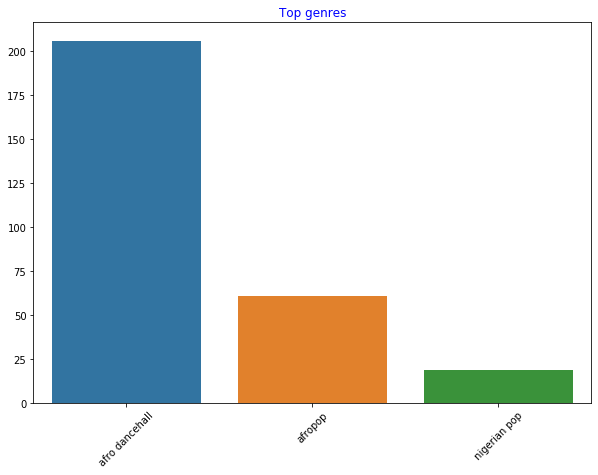

In [6]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [7]:
from sklearn.cluster import KMeans
wcss = []

X = df[['popularity','danceability']].values


for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


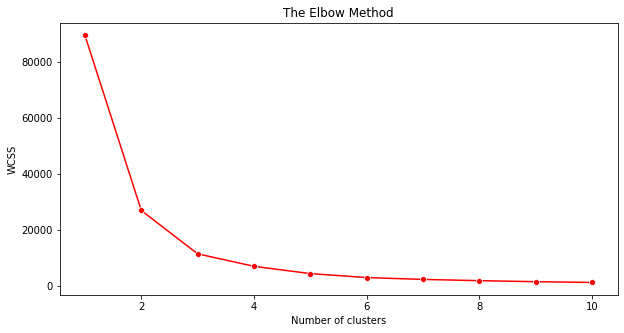

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

     popularity  danceability
1            30         0.710
3            14         0.894
4            25         0.702
5            26         0.803
6            29         0.818
..          ...           ...
514          20         0.838
515          14         0.786
519           2         0.879
522          26         0.863
525          10         0.735

[286 rows x 2 columns]


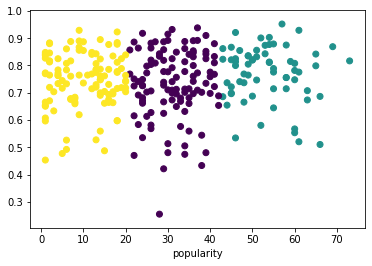

In [9]:
selection = df[['popularity','danceability']]
print(selection)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(selection)
labels = kmeans.predict(selection)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('danceability')
plt.xlabel('popularity')
plt.show()
